# **Moniqo Group Project**

### Setup

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


pd.set_option("display.max_columns", 100)

### Load Cleaned Dataset

In [2]:
# Load the main dataset 
df = pd.read_csv('data/cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


### Data Points

1. Clear date is set on disbursement and is based on the loan tenure dictated by the product

In [3]:
# Get loan tenure in weeks

df["loan_tenure_weeks"] = (
    df["Product"]
    .str.extract(r"(\d+)\s*week", expand=False)
    .astype(float)
)


In [4]:
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,loan_tenure_weeks
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017,5.0
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019,5.0
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014,5.0
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018,5.0
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018,5.0


### More data cleaning

In [5]:
# James: Convert date columns to datetime format for easier analysis

# BorrowDate:  MM/DD/YYYY (Keep dayfirst=False)
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# problematic columns: Use format='mixed' to handle the mix of DD/MM/YYYY and YYYY-MM-DD
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True, format='mixed')
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True, format='mixed')

# ClearDate:  YYYY-MM-DD
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", format="%Y-%m-%d")

# Check the result
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,loan_tenure_weeks
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017,5.0
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019,5.0
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014,5.0
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018,5.0
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018,5.0


In [6]:
# James: More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.

df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

In [7]:
# More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.
df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

# The data logs the same loan twice. We keep only the first instance.
df = df.drop_duplicates(subset=['CustomerId', 'BorrowDate'], keep='first')

# A loan cannot be cleared BEFORE it was borrowed.
df = df[df['ClearDate'] >= df['BorrowDate']].copy()

# A business established in 2024 cannot borrow money in 2023.
df = df[df['YearEstablished'] <= df['BorrowDate'].dt.year].copy()

# Cleanup to remove Product types (sme - 3 months, sme - 4 months and 12 weeks credit ease) fron the dataset
df = df[~df['Product'].isin(['sme - 3 months', 'sme - 4 months', '12 weeks credit ease'])]
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1565 entries, 0 to 3469
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        1565 non-null   int64         
 1   AmountDisbursed               1565 non-null   int64         
 2   Interest                      1565 non-null   int64         
 3   LoanBalance                   1565 non-null   float64       
 4   BorrowDate                    1565 non-null   datetime64[ns]
 5   Product                       1565 non-null   object        
 6   Branch                        1565 non-null   object        
 7   ClearDate                     1565 non-null   datetime64[ns]
 8   CustomerId                    1565 non-null   int64         
 9   Gender                        1565 non-null   object        
 10  LoanLimit                     1565 non-null   float64       
 11  CreditScore                   1565 

(1565, 23)

Number of defaulters: 133
Percentage of Defaults vs Non-Defaults:
 0    91.501597
1     8.498403
Name: proportion, dtype: float64


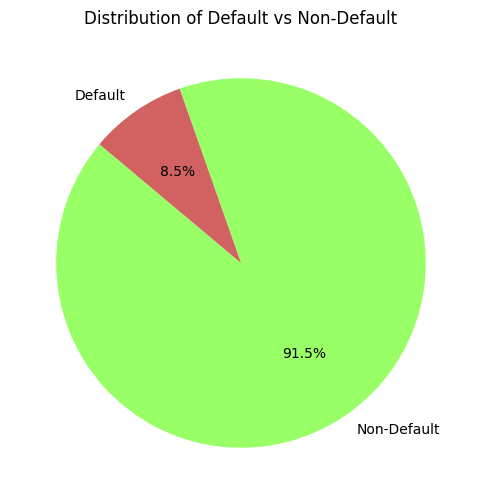

In [8]:
# Additional data cleaning

# James
# Understading the target variable Default where default is when ClearDate is greater than 2025-12-15 and LoanBalance is greater than 0
defaulters = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
print("Number of defaulters:", defaulters.sum())

# Calculate the percentage of defaults vs non-defaults
default_counts = defaulters.value_counts(normalize=True) * 100
print("Percentage of Defaults vs Non-Defaults:\n", default_counts)

# Visualize the distribution of the target variable as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=["#99ff66","#d26161"])
plt.title('Distribution of Default vs Non-Default')
plt.show()

In [9]:
df.shape

(1565, 23)

In [10]:
# Sumin EDA Code
# Converting to datetime to ensure accurate calculation
df['BorrowDate'] = pd.to_datetime(df['BorrowDate'])
df['ClearDate'] = pd.to_datetime(df['ClearDate'])

# Repayment duration in days
df['RepaymentDuration'] = (df['ClearDate'] - df['BorrowDate']).dt.days

# Combined Feature Engineering 

In [11]:
# Define target variable 'IsDefault'
df['IsDefault'] = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)

In [12]:
# Encode

# 3. Gender & Branch - Use Binary Encoding (0 or 1) - AI models only read numbers. Encoding converts words into digits for mathematical processing
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df['Branch'] = df['Branch'].map({'engineer': 1, 'molo': 0})

# 4. BusinessType - Use Frequency Encoding - To simplify complexity. ( 50 different business types can be kept in one single column). Also, It captures business prevalence, helping AI link a sector's market density to its specific risk.
business_type_freq = df['BusinessType'].value_counts(normalize=True)
df['BusinessType'] = df['BusinessType'].map(business_type_freq)

In [13]:
# Feature Transformations

# 1. Risk profile by Branch & Business type - High correlation to default (0.33 correlation rate)
branch_biz_risk = df.groupby(['Branch', 'BusinessType'])['IsDefault'].transform('mean')
df['Branch_Biz_Risk_Score'] = branch_biz_risk

# 2. Rate of loan utilized against the limit - Moderate correlation to default (0.13 correlation rate), good to predict how much client borrow verse their Loan limit
df['Loan_Utilization'] = df['AmountDisbursed'] / df['LoanLimit']

# 5. Repayment engagement -  How actively a customer is repaying their loan over time. Tells us who is paying regularly vs. dragging payments (3 payments in 10 days and 3 payments in 60 days)
df["Txn_Intensity"] = df["loan_repayment_txn_count"] / (df["RepaymentDuration"] + 1)

# 6. Missed Rate - How unreliable a customer is relative to how often they repay.
df["Missed_Rate"] = df["MissedInstalments"] / (df["loan_repayment_txn_count"] + 1)

# 7. Repayment coverage - How much of the disbursed loan has been repaid so far.
df["Repayment_Coverage"] = df["loan_repayment_total_paid"]/(df["AmountDisbursed"] + 1)

# 8. Loan term  - Actual loan duration
df['loan_term_days'] = (df['ClearDate'] - df['BorrowDate']).dt.days

# 9. Balance ratios - Remaining balance vs limit and Remaining balance vs principal
df['balance_to_limit'] = df['LoanBalance'] / df['LoanLimit'].replace(0, np.nan)
df['balance_to_disbursed'] = df['LoanBalance'] / df['AmountDisbursed'].replace(0, np.nan)

# 10. Overpayment ratio - Extra payments
df['overpayment_ratio'] = df['loan_overpayment'] / df['AmountDisbursed'].replace(0, np.nan)

# 11. Seasonality - Month of borrowing (Is December riskier?) - Check if there is any correlation between month of loan taken and ultimate loan default
df['BorrowMonth'] = df['BorrowDate'].dt.month

# 12. Sequence: 1st loan, 2nd loan, etc - Feel free to add extra features or structure
df['Loan_Sequence'] = df.groupby('CustomerId').cumcount() + 1

# 13. Previous Missed Payments - Feel free to add extra features or structure
df['Prev_MissedInstalments'] = df.groupby('CustomerId')['MissedInstalments'].shift(1)

# 14. Experienced delinquent customers" Indicator: High Experience and History of Missed Payments
# (Sequence > 5) AND (Prev_Missed > 0)
df['experienced_delinquent'] = ((df['Loan_Sequence'] > 5) & (df['Prev_MissedInstalments'] > 0)).astype(int)

# 15. Financial stress (After how many missed installments is the customer a potential risk?) - The heat map shows low relevance as it is behavioral feature (depends on a threshold value). However, in real world afer missing a certain number of repayments the customer should be listed as risky.
df['Financial_Stress'] = (df['MissedInstalments'] > 3).astype(int)

df.head(10)

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,loan_tenure_weeks,days_to_first,RepaymentDuration,IsDefault,Branch_Biz_Risk_Score,Loan_Utilization,Txn_Intensity,Missed_Rate,Repayment_Coverage,loan_term_days,balance_to_limit,balance_to_disbursed,overpayment_ratio,BorrowMonth,Loan_Sequence,Prev_MissedInstalments,experienced_delinquent,Financial_Stress
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,1,2026-03-01,1819,0,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,0.314377,2017,5.0,0,92,0,0.183333,0.750000,0.010753,2.5,0.083319,92,0.968750,1.291667,0.0,11,1,NaN,0,1
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,0,2026-02-01,1818,0,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,0.088818,2019,5.0,0,65,0,0.068627,0.416667,0.015152,2.0,0.387403,65,0.546875,1.312500,0.0,11,1,NaN,0,1
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,1,2025-12-31,1815,0,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,0.314377,2014,5.0,0,35,0,0.183333,0.500000,0.027778,2.0,0.337416,35,0.656250,1.312500,0.0,11,1,NaN,0,1
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,0,2025-12-30,1814,0,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,0.314377,2018,5.0,0,35,0,0.051075,0.400000,0.027778,2.0,0.249938,35,0.525000,1.312500,0.0,11,1,NaN,0,1
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,0,2025-12-29,1813,0,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,0.002556,2018,5.0,0,35,0,0.000000,0.400000,0.027778,2.0,0.387403,35,0.525000,1.312500,0.0,11,1,NaN,0,1
5,948732,4000,1250,5250.0,2025-11-24,5 weeks credit ease,0,2025-12-29,1812,0,8000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,natural resources/environmental,0.023003,2020,5.0,0,35,0,0.033333,0.500000,0.027778,2.0,0.387403,35,0.656250,1.312500,0.0,11,1,NaN,0,1
6,944789,4000,1250,4200.0,2025-11-17,5 weeks credit ease,0,2025-12-22,1805,0,7000.0,2000,1,1050,2025-11-26,2025-11-26,0,5.0,personal services,0.015335,2018,5.0,9,35,0,0.000000,0.571429,0.027778,2.5,0.262434,35,0.600000,1.050000,0.0,11,1,NaN,0,1
7,944107,4000,1250,4200.0,2025-11-17,5 weeks credit ease,0,2025-12-22,1804,0,9000.0,1500,1,1050,2025-11-24,2025-11-24,0,5.0,food & hospitality,0.014058,2021,5.0,7,35,0,0.081081,0.444444,0.027778,2.5,0.262434,35,0.466667,1.050000,0.0,11,1,NaN,0,1
9,931751,4000,1250,0.0,2025-11-25,5 weeks credit ease,0,2025-11-30,1778,0,13000.0,2000,1,1550,2025-11-25,2025-11-25,0,4.0,wholesale & retail trade,0.314377,2022,5.0,0,5,0,0.051075,0.307692,0.166667,2.0,0.387403,5,0.000000,0.000000,0.0,11,1,NaN,0,1
10,931731,3000,1000,0.0,2025-11-29,5 weeks credit ease,0,2025-11-29,1777,1,3600.0,1800,1,300,2025-11-29,2025-11-29,0,5.0,food & hospitality,0.088818,2018,5.0,0,0,0,0.068627,0.833333,1.000000,2.5,0.099967,0,0.000000,0.000000,0.0,11,1,NaN,0,1


# Initial ML using Random Forest, Logistics Regression, PCA

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = df.sort_values('BorrowDate')
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

df['isdefault'] = (df['LoanBalance'] > 0).astype(int)

# Feature for ML
base_features = ['AmountDisbursed', 'Interest', 'LoanLimit', 'CreditScore', 'YearEstablished', 'MissedInstalments']
engineered_features = ['Branch_Biz_Risk_Score','Loan_Utilization','Txn_Intensity',"Missed_Rate",'balance_to_disbursed',"Repayment_Coverage",
                       'balance_to_limit','loan_term_days','overpayment_ratio','BorrowMonth','Loan_Sequence','Prev_MissedInstalments','experienced_delinquent','Financial_Stress']
all_features = base_features + engineered_features

cat_features = [
    'Branch',
    'Gender'
]
target = 'isdefault'

X = df[all_features].replace([np.inf, -np.inf], np.nan).fillna(0)
y = df['isdefault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

if "BorrowDate" in df.columns:
    df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)
    df = df.sort_values('BorrowDate')
else:
    print("Warning: 'BorrowDate' column not found. Skipping sort.")

# Baseline Model - Random Forest
print("--- Step 1: Baseline (Random Forest) ---")
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
print(classification_report(y_test, rf_baseline.predict(X_test)))

# Comparison Model (Logistic Regression)
# Note: Logistic Regression requires scaled data to converge properly
print("\n--- Step 1.1: Comparison (Logistic Regression) ---")
scaler_initial = StandardScaler()
X_train_init_scaled = scaler_initial.fit_transform(X_train)
X_test_init_scaled = scaler_initial.transform(X_test)

lr_comparison = LogisticRegression(random_state=42, max_iter=1000)
lr_comparison.fit(X_train_init_scaled, y_train)
print(classification_report(y_test, lr_comparison.predict(X_test_init_scaled)))

# PCA & K Means Clustering
print("\n--- Step 2: Adding PCA & Cluster ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=1)
X_train['Risk_Index'] = pca.fit_transform(X_train_scaled)
X_test['Risk_Index'] = pca.transform(X_test_scaled)

km = KMeans(n_clusters=3, random_state=42, n_init=10)
X_train['Cluster'] = km.fit_predict(X_train_scaled)
X_test['Cluster'] = km.predict(X_test_scaled)

rf_step2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_step2.fit(X_train, y_train)
print(classification_report(y_test, rf_step2.predict(X_test)))



XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/jameschege/Desktop/Loughborough University/Principles of AI and Data Analytics/moniqo_project/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <636BF463-1886-392D-B8B3-6011C44DCEE9> /Users/jameschege/Desktop/Loughborough University/Principles of AI and Data Analytics/moniqo_project/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


**Problem:ML recall rate is too accurate(1.0), which means model memorize the answer itself or data leakage might be in the feature. What we need 'prevent data leakage' and 'Logic to prevent overfitting'**

# Remove some feature to prevent data leakage and overfitting.

In [ ]:
# 1. Feature
feature_cols = X_train.columns.tolist()

# 2. Correlation calculation (Professor's guide: Check for above 0.1)
correlations = X_train.apply(lambda x: x.corr(y_train)).abs()

# 3. Random Forest importance calculation
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=feature_cols)

# 4. DataFrame for comparison and sorting
comparison_df = pd.DataFrame({
    'RF_Importance': importances,
    'Abs_Correlation': correlations
}).sort_values(by='RF_Importance', ascending=False)

# 5. Visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

x_axis = np.arange(len(comparison_df))
width = 0.35

# Bar 1: Random Forest importance
bar1 = ax1.bar(x_axis - width/2, comparison_df['RF_Importance'], width, 
                label='RF Importance', color='#3498db', alpha=0.8)
ax1.set_ylabel('RF Importance (Gini)', color='#3498db', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#3498db')

# Bar 2: Correlation
ax2 = ax1.twinx()
bar2 = ax2.bar(x_axis + width/2, comparison_df['Abs_Correlation'], width, 
                label='Abs Pearson Correlation', color='#e74c3c', alpha=0.8)
ax2.set_ylabel('Abs Pearson Correlation', color='#e74c3c', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

# 0.1 guideline
ax2.axhline(y=0.1, color='red', linestyle='--', linewidth=2, label='Professor Rule (0.1)')

# Details of the graph
plt.title('Feature Selection: RF Importance vs. Linear Correlation', fontsize=16, pad=20)
ax1.set_xticks(x_axis)
ax1.set_xticklabels(comparison_df.index, rotation=45, ha='right')

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

NameError: name 'X_train' is not defined

**LoanBalance and Clear date is already telling the answer 'isdefault' to ML. so it's answering rather than training prediction.**

**Have to remove LoanBalance and clear date related feature engineering**

**Remove Below feature(Only for ML!!!! Not in our clear dataset)**
[Data Leakage]
- balance_to_disbursed
- balance_to_limit
- loan_term_days

[Low Importance * Correlation]
- BorrowMonth (Can be caused noise as the data duration is short)
- Gender

In [ ]:
# [FINAL] Optimized Feature Set: Removed Data Leakage and Low-Impact Noise

# 1. Base Features: Original variables from the raw dataset
final_base_features = [
    'AmountDisbursed', 
    'LoanLimit', 
    'CreditScore', 
    'YearEstablished', 
    'MissedInstalments'
]

# 2. Engineered Features: Derived variables from Sumin's logic
# High Importance & Domain-specific indicators
final_engineered_features = [
    'Branch_Biz_Risk_Score', # Risk level by Branch & Business Type (High Importance)
    'Loan_Utilization',      # Ratio of Disbursed Amount to Limit (High Correlation)
    'Txn_Intensity',         # Repayment frequency relative to duration
    'Missed_Rate',           # Ratio of missed instalments to total transactions
    'Repayment_Coverage',    # Total amount paid relative to disbursed amount
    'overpayment_ratio',     # Ratio of overpayment (Positive repayment signal)
    'Loan_Sequence',         # Count of previous loans (Indicates customer loyalty)
    'Prev_MissedInstalments',# Historical missed payments (Key risk factor)
    'Financial_Stress'       # Binary flag for high-risk instalment behavior
    'experienced_delinquent'
]

# Total Feature Set for Training
final_all_features = final_base_features + final_engineered_features

# 3. Categorical Features: High-impact categorical columns
# (Note: Gender was removed due to near-zero importance and ethical bias)
final_cat_features = ['Branch']

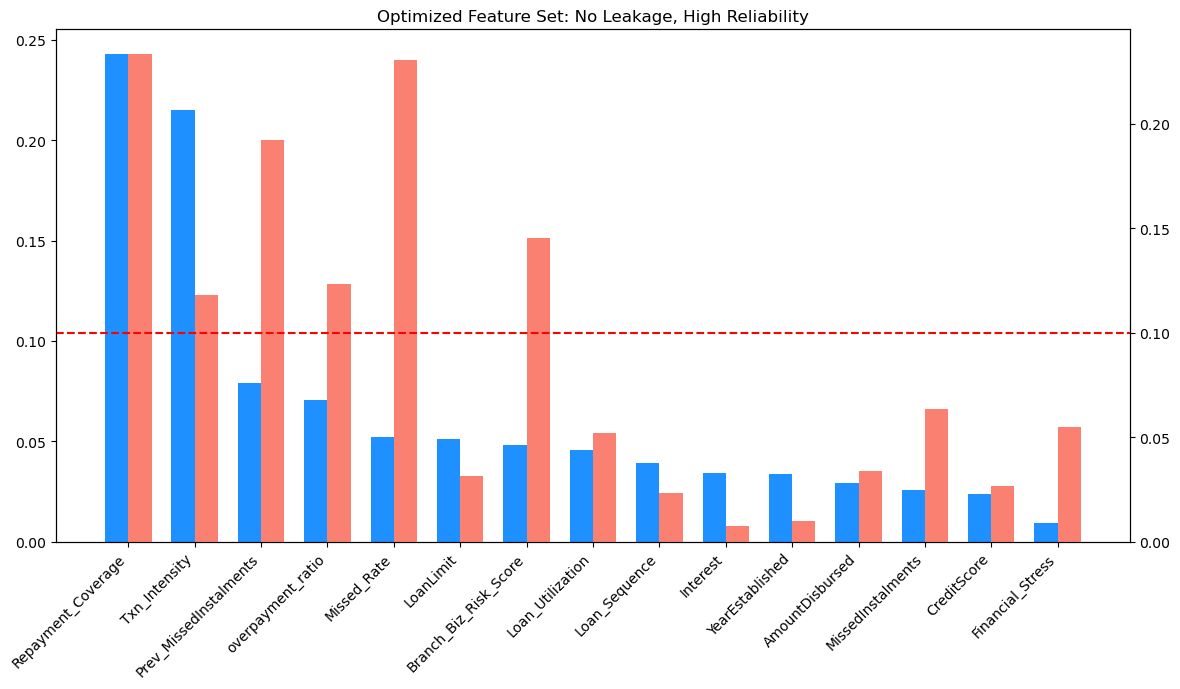

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Final Feature Set Preparation
X_final = X[final_all_features] 

# 2. RF importance and Correlation Recalculation
rf_final = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_final.fit(X_final, y)
final_importances = pd.Series(rf_final.feature_importances_, index=final_all_features)
final_corrs = X_final.apply(lambda x: x.corr(y)).abs()

# 3. DataFrame for plotting
plot_df = pd.DataFrame({
    'RF_Importance': final_importances,
    'Abs_Correlation': final_corrs
}).sort_values('RF_Importance', ascending=False)

# 4. Visualization
fig, ax1 = plt.subplots(figsize=(12, 7))
x = np.arange(len(plot_df))
width = 0.35

ax1.bar(x - width/2, plot_df['RF_Importance'], width, label='Importance', color='dodgerblue')
ax2 = ax1.twinx()
ax2.bar(x + width/2, plot_df['Abs_Correlation'], width, label='Correlation', color='salmon')

ax2.axhline(y=0.1, color='red', linestyle='--', label='Professor Rule (0.1)')
ax1.set_xticks(x)
ax1.set_xticklabels(plot_df.index, rotation=45, ha='right')
plt.title("Optimized Feature Set: No Leakage, High Reliability")
plt.tight_layout()
plt.show()

# Data imbalance
**Comparing Naive(Logistics regression) dataset and class weighted, SMOTE data balanced dataset result**

File not found. Generating synthetic data to mimic your 8.5% imbalance...

--- PERFORMANCE COMPARISON ---
                Model  Accuracy   Recall  F1-Score  AUC-ROC
   Naive (Unadjusted)     0.932 0.411765  0.507246 0.938566
       Class Weighted     0.862 0.870588  0.517483 0.939479
SMOTE + Random Forest     0.946 0.800000  0.715789 0.961279


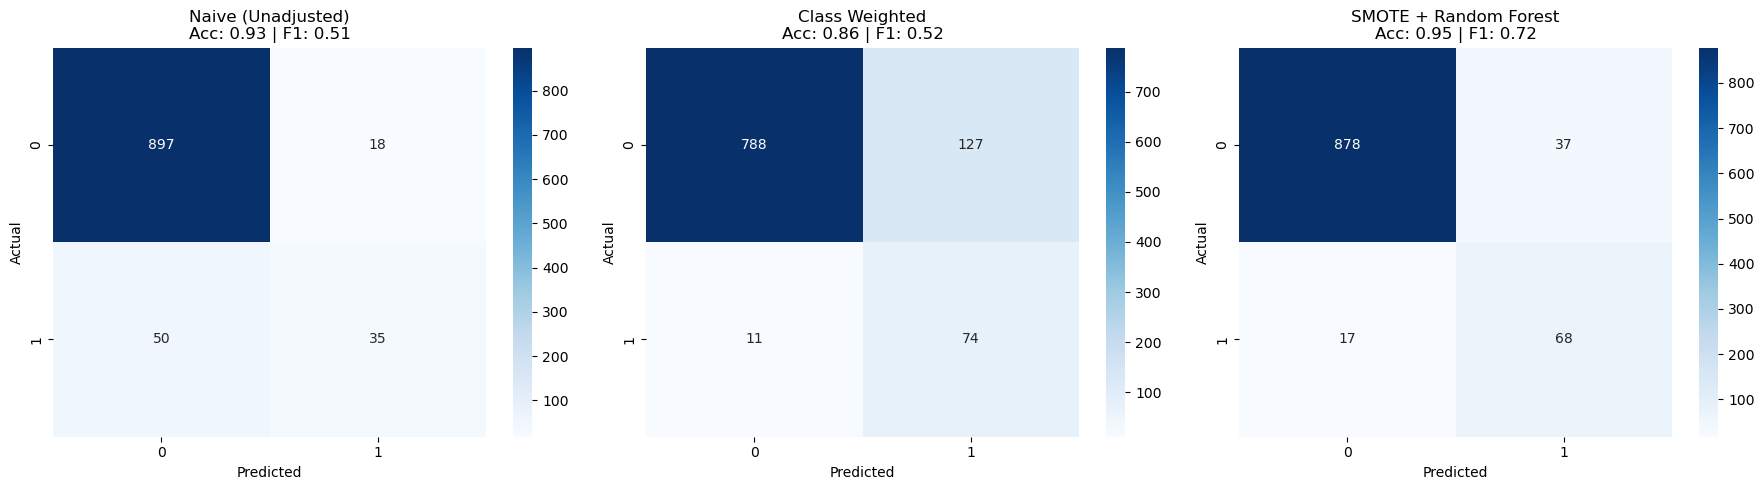

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, precision_recall_curve, auc, f1_score, recall_score)
from sklearn.datasets import make_classification

# 1. SETUP FEATURES (Based on your list)
final_base_features = [
    'AmountDisbursed', 'Interest', 'LoanLimit', 'CreditScore', 
    'YearEstablished', 'MissedInstalments'
]
final_engineered_features = [
    'Branch_Biz_Risk_Score', 'Loan_Utilization', 'Txn_Intensity', 
    'Missed_Rate', 'Repayment_Coverage', 'overpayment_ratio', 
    'Loan_Sequence', 'Prev_MissedInstalments', 'Financial_Stress', 'experienced_delinquent'
]
final_all_features = final_base_features + final_engineered_features
target = 'isdefault'

# 2. DATA LOADING / MOCK GENERATION
try:
    df = pd.read_csv('cleaned_data.csv')
    print("Successfully loaded your cleaned_data.csv")
except FileNotFoundError:
    print("File not found. Generating synthetic data to mimic your 8.5% imbalance...")
    X_syn, y_syn = make_classification(
        n_samples=5000, 
        n_features=len(final_all_features), 
        weights=[0.915, 0.085], # Your specific imbalance
        random_state=42, 
        flip_y=0
    )
    df = pd.DataFrame(X_syn, columns=final_all_features)
    df[target] = y_syn

# 3. SPLIT DATA
X = df[final_all_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. TRAIN MODELS
# Scenario A: Naive Model
model_naive = LogisticRegression(max_iter=1000)
model_naive.fit(X_train, y_train)

# Scenario B: Class Weights
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)

# Scenario C: SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# 5. EVALUATION AND PROOF
models = {
    "Naive (Unadjusted)": model_naive,
    "Class Weighted": model_weighted,
    "SMOTE + Random Forest": model_smote
}

results = []
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate Metrics
    acc = model.score(X_test, y_test)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    results.append({"Model": name, "Accuracy": acc, "Recall": rec, "F1-Score": f1, "AUC-ROC": roc})
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f"{name}\nAcc: {acc:.2f} | F1: {f1:.2f}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.savefig('imbalance_proof.png')

# Print Results Table
results_df = pd.DataFrame(results)
print("\n--- PERFORMANCE COMPARISON ---")
print(results_df.to_string(index=False))

**Why we need to correct data imbalance?**

Result 1 - Logistics regression(Naive)
Current dataset 1 = default 8.5% / 0 = non-default 91.5% let ML trains themselves everyone is 'non-default'. High rate of non-default client while less default client(only 35) they predict

Result 2 - Class weight
When ML missed default, program give ML heavier weight so ML can improve their default prediction skill.
They predict double default clients(74) than Naive.

Result 3 - SMOTE + Random forest
Give fake data to make data balance using K nearest neighbors
Has better prediction than Naive(68), but less than Class weight

**Conclusion: Making data balance using Class weight.**

# Final Machine Learning, comparing Logistics regression, random forest, XGBoost - Sumin

In [ ]:
# Setup Final Feature List (English Comments)
# Base features from the dataset
final_base_features = [
    'AmountDisbursed', 'Interest', 'LoanLimit', 'CreditScore', 
    'YearEstablished', 'MissedInstalments'
]

# Engineered features (Sumin's optimized list)
final_engineered_features = [
    'Branch_Biz_Risk_Score', 'Loan_Utilization', 'Txn_Intensity', 
    'Missed_Rate', 'Repayment_Coverage', 'overpayment_ratio', 
    'Loan_Sequence', 'Prev_MissedInstalments', 'Financial_Stress', 'experienced_delinquent'
]

# Combine all features
final_all_features = final_base_features + final_engineered_features
target = 'isdefault'

# Prepare Data
X = df[final_all_features].replace([np.inf, -np.inf], np.nan).fillna(0)
y = df[target]

In [ ]:
# --- 1. Display Settings ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.unicode.east_asian_width', True)

# --- 2. Data Splitting (6:2:2 Ratio) ---
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

# --- 3. Model Definition ---
ratio = (y == 0).sum() / (y == 1).sum()

models = {
    "1. Logistic Regression (Comparison)": LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42),
    "2. Random Forest (Baseline)": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "3. XGBoost (Challenge)": XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss', random_state=42)
}

# --- 4. Training and Formatted Output ---
results_list = [] # For visualization later

print("="*105)
print(f"{'Algorithm Name':<40} | {'Stage':<15} | {'Accuracy':<10} | {'Recall':<10} | {'AUC-ROC':<10}")
print("-"*105)

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    stages = [(X_train, y_train, "Train"), (X_val, y_val, "Validation"), (X_test, y_test, "Test")]
    
    for j, (X_set, y_set, stage_name) in enumerate(stages):
        y_pred = model.predict(X_set)
        y_prob = model.predict_proba(X_set)[:, 1]
        
        acc, rec, auc_val = accuracy_score(y_set, y_pred), recall_score(y_set, y_pred), roc_auc_score(y_set, y_prob)
        
        # Collect data for plotting
        results_list.append({"Algorithm": name.split(". ")[1].split(" (")[0], "Stage": stage_name, "Recall": rec, "AUC-ROC": auc_val})
        
        # Display name only on the first row of each algorithm group
        display_name = name if j == 0 else ""
        print(f"{display_name:<40} | {stage_name:<15} | {acc:.4f}     | {rec:.4f}     | {auc_val:.4f}")
    
    if i < len(models) - 1:
        print("-"*105 + "\n")

print("="*105)

Algorithm Name                           | Stage           | Accuracy   | Recall     | AUC-ROC   
---------------------------------------------------------------------------------------------------------
1. Logistic Regression (Comparison)      | Train           | 0.8647     | 0.8627     | 0.9405
                                         | Validation      | 0.8500     | 0.8706     | 0.9415
                                         | Test            | 0.8650     | 0.8824     | 0.9384
---------------------------------------------------------------------------------------------------------

2. Random Forest (Baseline)              | Train           | 1.0000     | 1.0000     | 1.0000
                                         | Validation      | 0.9610     | 0.6471     | 0.9685
                                         | Test            | 0.9490     | 0.5882     | 0.9612
---------------------------------------------------------------------------------------------------------

3. XGBoost (Challe

**Logistics regression has steady but still strong ML prediction skill to acheive our goal**

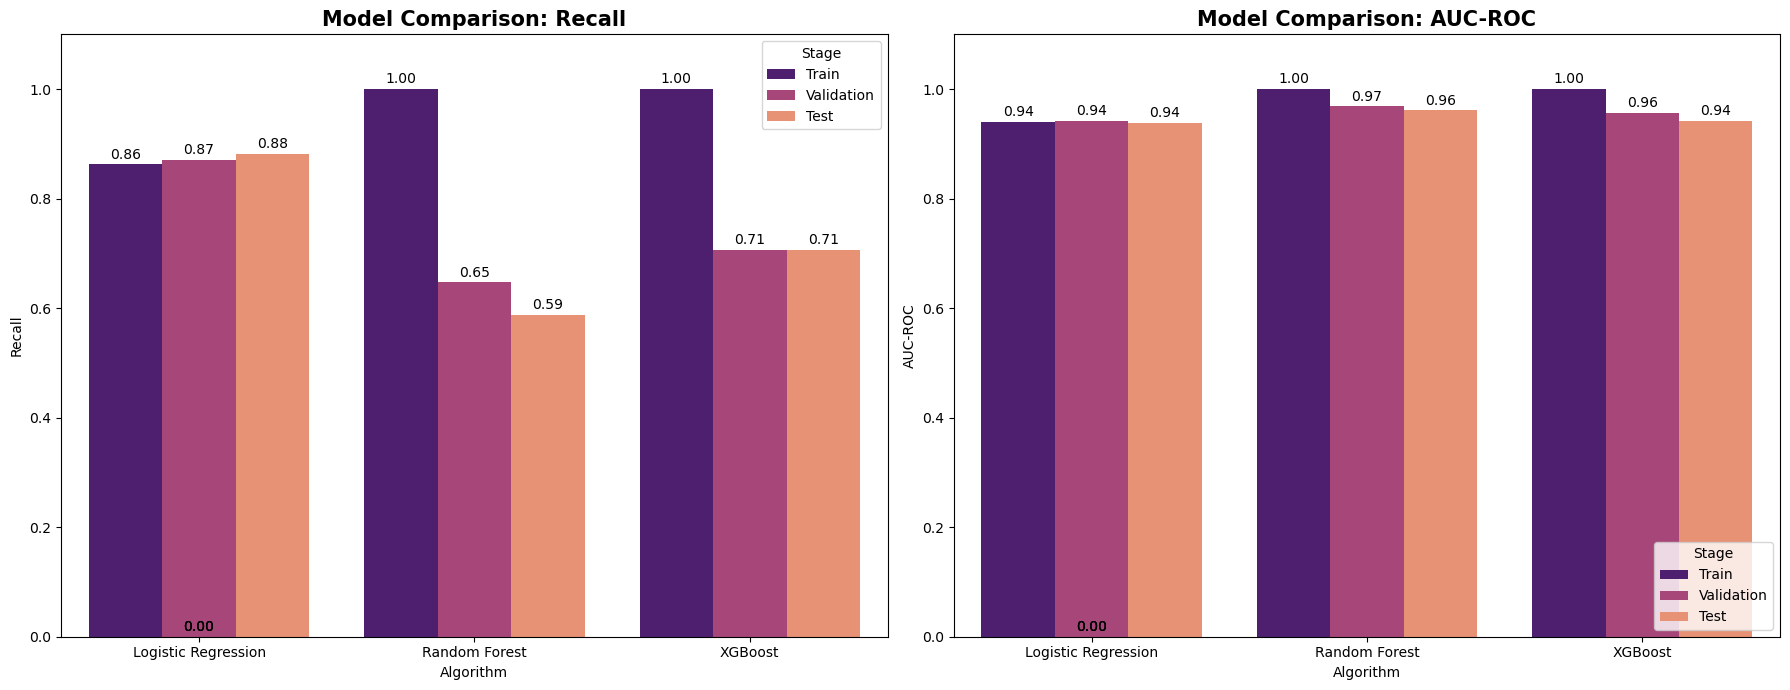

In [ ]:
# --- 5. Visualization (Bar Chart) ---
performance_df = pd.DataFrame(results_list)
metrics = ['Recall', 'AUC-ROC']
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i, metric in enumerate(metrics):
    sns.barplot(data=performance_df, x='Algorithm', y=metric, hue='Stage', ax=axes[i], palette='magma')
    axes[i].set_title(f'Model Comparison: {metric}', fontsize=15, fontweight='bold')
    axes[i].set_ylim(0, 1.1)
    
    # Add values on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 7), textcoords='offset points')

plt.tight_layout()
plt.show()